# Task-01
### Stock Prediction :-
Take stock price of any company you want and predicts its price by using LSTM

### Tesla Stock price prediction
Stock Market Prediction involves the use of data and models to forecast the future value of company stocks** and other financial instruments traded on an exchange.

In this project, we employed machine learning techniques, specifically Linear Regression and Long Short-Term Memory (LSTM) networks, to construct our stock market price prediction models for two different companies, Tesla and Google

Linear Regression is a supervised learning algorithm used to predict continuous outcomes. It finds applications in various domains, such as estimating a company's total revenue, forecasting product sales, making weather predictions, and even predicting stock market trends

In the equation (y = mx + c), which represents a linear regression model:

        (y) represents the dependent variable or the predicted outcome.
        (x) represents the independent variable or the input feature.
        (m) is the slope of the line, which represents how much (y) changes for a unit change in (x).
        (c) is the intercept, which is the value of (y) when (x) is 0.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# For Offline plotting
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)


In [ ]:
tesla = pd.read_csv('tesla.csv')

In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
# Coverting Date column into Datetime format using pandas libaray and its fuction

In [ ]:
print(f'Dataframe Contains Stock Price Between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} Days')

# simply i have just display the max date and min date and calcaulated total days

Dataframe Contains Stock Price Between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total Days = 3617 Days


In [ ]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

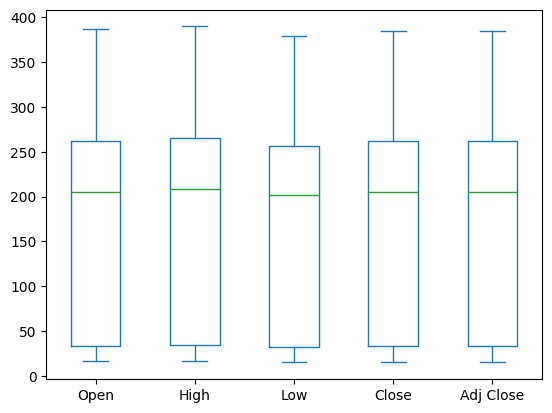

In [ ]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
import plotly.graph_objs as go

# Define the trace for Tesla stock prices
tesla_trace = go.Scatter(
    x=tesla['Date'],
    y=tesla['Close'],
    mode='lines+markers',
    name='Tesla Stock Close Price',
    line=dict(color='blue', width=2),  # Customize line color and width
    marker=dict(size=8, color='red', symbol='circle'),  # Customize marker size, color, and symbol
)

# Create a layout for the plot
layout = go.Layout(
    title='Tesla Stock Price',
    title_font=dict(size=24, color='navy', family='Arial'),  # Customize title font, size, and color
    xaxis=dict(title='Date', showgrid=True, titlefont=dict(size=18)),  # Customize x-axis label and grid
    yaxis=dict(title='Price', showgrid=True, titlefont=dict(size=18)),  # Customize y-axis label and grid
    paper_bgcolor='lightgray',  # Customize plot background color
)

# Create a Figure and add the trace to it
plot = go.Figure(data=[tesla_trace], layout=layout)

# Display the plot
plot.show()


In [ ]:
# Building  the regression model
from sklearn.model_selection import train_test_split

# for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evalution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
# split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 101)

In [ ]:
# feature scaling
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
     x = X_train.T[0],
     y = Y_train,
     mode = 'markers' ,
     name = 'Actual'
)
trace1 = go.Scatter(
     x = X_train.T[0],
     y = lm.predict(X_train).T ,
     mode = 'lines' ,
     name = 'Predicted'
)

tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data,layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate scores for model evaluation
train_r2 = r2_score(Y_train, lm.predict(X_train))
test_r2 = r2_score(Y_test, lm.predict(X_test))

train_mse = mean_squared_error(Y_train, lm.predict(X_train))
test_mse = mean_squared_error(Y_test, lm.predict(X_test))

# Create a formatted string for displaying scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{train_r2:.2f}\t{test_r2:.2f}
{'MSE'.ljust(10)}{train_mse:.2f}\t{test_mse:.2f}
'''

# Split the scores string by newline and print each line separately
print(scores)


Metric           Train                Test        
r2_score  0.87	0.86
MSE       1821.38	1780.99



## Predicting Google Stock Prices with LSTM



**LSTM (Long Short-Term Memory) Networks for Sequential Data Prediction**

LSTMs are a type of Recurrent Neural Network (RNN) designed for processing sequential data, such as time series, making them valuable for predicting stock prices, weather patterns, or understanding language.

**Three Key Steps of LSTM Operation:**

1. **Forgetting Irrelevant Information:**
   - LSTMs decide which information from the previous state is irrelevant for the current task using a "forget gate."
   - The forget gate is controlled by a sigmoid function:
     ```
     Forget Gate = sigmoid(W_f * [h_(t-1), x_t] + b_f)
     ```
     Where W_f represents the weight matrix, and b_f is the bias.

2. **Updating the Cell State:**
   - LSTMs selectively update the cell state based on new input and previously retained information.
   - They use "input gates" to determine what to add to the cell state and "output gates" to control what parts of the cell state should be exposed to the next steps.
   - Formulas for input and output gates:
     ```
     Input Gate = sigmoid(W_i * [h_(t-1), x_t] + b_i)
     Output Gate = sigmoid(W_o * [h_(t-1), x_t] + b_o)
     ```

3. **Outputting Relevant Information:**
   - LSTMs produce an output by considering the current cell state and deciding which parts are relevant for the specific prediction or task.
   - The cell state update is defined as:
     ```
     Cell State (t) = Cell State (t-1) ⊙ Forget Gate + Input Gate ⊙ Tanh(W_c * [h_(t-1), x_t] + b_c)
     ```
   - The final output is determined as:
     ```
     Output (t) = Output Gate ⊙ Tanh(Cell State (t))
     ```

In summary, LSTMs are capable of:
1. **Forgetting Irrelevant Parts:** They decide what information to forget from the past.
2. **Selective Updates:** They update the cell state selectively based on new input.
3. **Outputting Relevant Information:** They decide which parts of the cell state are relevant for the current prediction or task.

LSTMs are highly effective at capturing long-term dependencies in sequential data, making them suitable for a wide range of applications involving time series and sequential information.

In [ ]:
# Importing Libraries for LSTM Model
# NumPy and Pandas for numerical computation and data manipulation
import numpy as np
import pandas as pd
# Matplotlib for data visualization
import matplotlib.pyplot as plt
# MinMaxScaler from Scikit-Learn for feature scaling
from sklearn.preprocessing import MinMaxScaler
# Sequential, Dense, LSTM, and Dropout layers from Keras for building the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# Explanation:
# - NumPy and Pandas are used for numerical computations and data manipulation.
# - Matplotlib is used for data visualization.
# - MinMaxScaler from Scikit-Learn is used to scale features to a specified range.
# - Sequential is from Keras and is used to create a sequential neural network model.
# - Dense is a fully connected neural network layer.
# - LSTM is a type of recurrent layer specialized for sequence data.
# - Dropout is a regularization technique to prevent overfitting in the model.

In [ ]:
# Importing the Data
data = pd.read_csv('Google_train_data.csv')

In [ ]:
# Displaying the First 6 Rows of the Data
data.head(6)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"


In [ ]:
# Displaying Information About the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
# Converting "Close" Column to Numeric Type

data["Close"] = pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()
trainData = data.iloc[:, 4:5].values

In [ ]:
# Displaying Information About the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
# Checking the Shape of Scaled "trainData"
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
# Verify data dimensions
trainData.shape

(1149, 1)

In [ ]:
import numpy as np

X_train = []
y_train = []


for i in range(60, len(trainData)):
    X_train.append(trainData[i - 60:i, 0])
    y_train.append(trainData[i, 0])

# Convert the lists to NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [ ]:
# Creating a Sequential LSTM Model
model = Sequential()

# Adding the First LSTM Layer with Dropout
model.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

# Adding the Second LSTM Layer with Dropout
model.add(LSTM(units=100,return_sequences =True))
model.add(Dropout(0,2))

# Adding the Third LSTM Layer with Dropout
model.add(LSTM(units=100,return_sequences= True))
model.add(Dropout(0.2))

# Adding the Fourth LSTM Layer with Dropout
model.add(LSTM(units=100,return_sequences= False))
model.add(Dropout(0.2))

# Adding the Output Dense Layer
model.add(Dense(units =1))

# Compiling the Model with Adam Optimizer and Mean Squared Error Loss
model.compile(optimizer='adam',loss="mean_squard_error")

In [ ]:
# Compiling the LSTM model with Adam optimizer and training for 20 epochs
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train , y_train , epochs = 20 , batch_size = 32 ,verbose = 2)

Epoch 1/20
35/35 - 13s - loss: 0.0432 - 13s/epoch - 358ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0119 - 4s/epoch - 114ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0091 - 5s/epoch - 131ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0085 - 4s/epoch - 117ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0074 - 4s/epoch - 116ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0068 - 5s/epoch - 149ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0073 - 4s/epoch - 121ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0071 - 4s/epoch - 115ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0064 - 5s/epoch - 134ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0079 - 4s/epoch - 115ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0059 - 4s/epoch - 115ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 133ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0063 - 4s/epoch - 114ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0059 - 4s/epoch - 116ms/step
Epoch 15/20
35/35 - 5s - loss: 0.0047 - 5s/epoch - 134ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0047 - 4s/epoch - 114ms/step
Epoch 17/20
35/

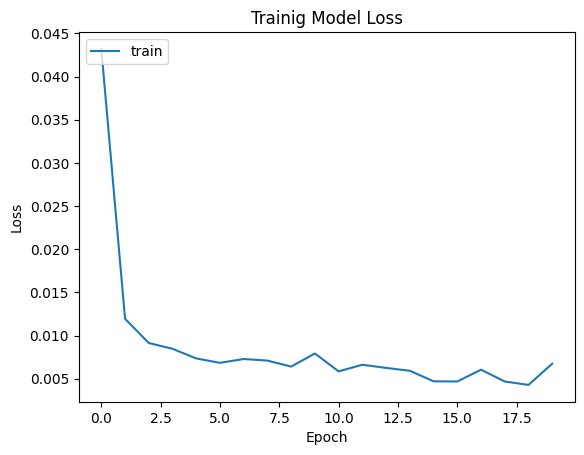

In [ ]:
# Plotting the training loss over epochs
plt.plot(hist.history['loss'])
plt.title('Trainig Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [ ]:
# Preparing Test Data for LSTM Model

# Reading and Preprocessing Test Data
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]

# Extracting Target Values for Test Data
y_test = testData.iloc[60:,0:].values

# Extracting and Scaling Input Data
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

# Defining Time Step and Preparing Sequences for Input
X_test = []
length = len(testData)
timestep = 60
for i in range (timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Checking the Shape of the Prepared Test Data
X_test.shape

(192, 60, 1)

In [ ]:
# Making Predictions Using the LSTM Model
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 33ms/step


array([[1.1813954],
       [1.182604 ],
       [1.1942773],
       [1.2115141],
       [1.2231215],
       [1.2180775],
       [1.1998314],
       [1.179521 ],
       [1.1700021],
       [1.1710699],
       [1.1662345],
       [1.1553143],
       [1.1460023],
       [1.1375706],
       [1.137626 ],
       [1.1442055],
       [1.1651398],
       [1.1952761],
       [1.2268605],
       [1.2558552],
       [1.2611787],
       [1.2504056],
       [1.2240223],
       [1.1927242],
       [1.1692677],
       [1.160851 ],
       [1.1644038],
       [1.1682618],
       [1.1611618],
       [1.1490427],
       [1.136103 ],
       [1.1219234],
       [1.1004616],
       [1.0748326],
       [1.0684241],
       [1.0838417],
       [1.1099463],
       [1.1353056],
       [1.1562864],
       [1.1625185],
       [1.1707976],
       [1.1837778],
       [1.200343 ],
       [1.2155559],
       [1.2247175],
       [1.223412 ],
       [1.2107764],
       [1.2022202],
       [1.2027925],
       [1.2126231],


In [ ]:
# Inversely transforming the predicted prices to their original scale
predicted_price = sc.inverse_transform(y_pred)

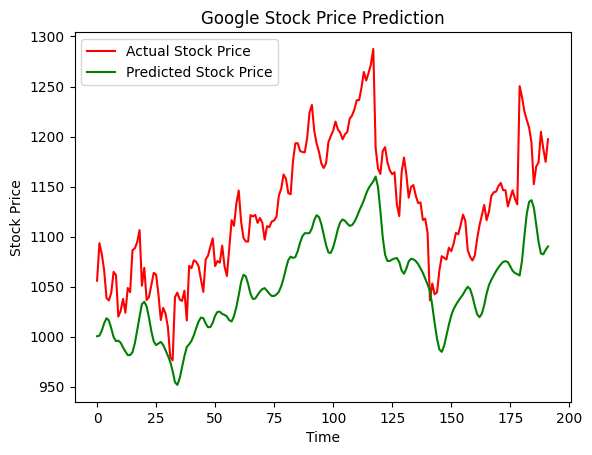

In [ ]:
# Plotting actual and predicted stock prices for Google
plt.plot(y_test,color = 'red',label = 'Actual Stock Price')
plt.plot(predicted_price , color = 'green' , label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()